In [1]:
import dolfin as dl
import numpy as np
import ufl
import argparse


path_to_hippylib = '../../hippylib/'
import sys, os
sys.path.append( os.environ.get('HIPPYLIB_PATH',path_to_hippylib))
from hippylib import *

# from hippylib.utils.nb import plot_eigenvectors

from plot_eigenvectors import plot_eigenvectors, plot_eigenvector

sys.path.append( os.environ.get('HIPPYFLOW_PATH'))
from hippyflow import *

from maternPrior import BiLaplacian2D

In [2]:
nx = 128
ny = 128
gamma = 1.0
delta = 5.0 
formulation = 'single_freq'
n_obs = 100

data_path = 'data/'+formulation+'_n_obs_'+str(n_obs)+'_g'+str(gamma)+'_d'+str(delta)+'_nx'+str(nx)+'/'

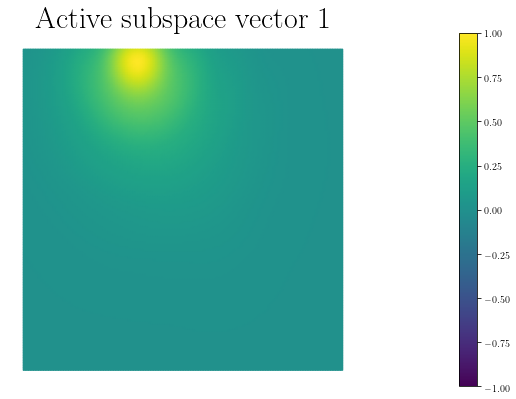

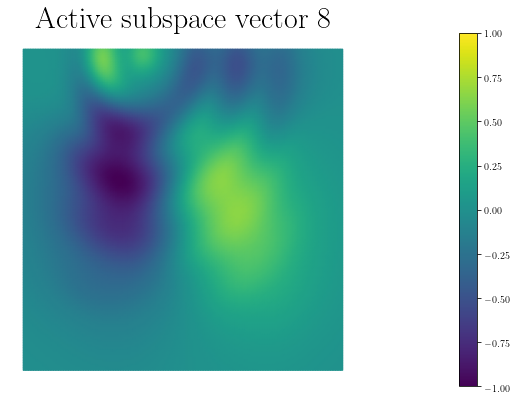

In [3]:

box = [0., 0., 3., 3.]
box_pml = [-1., -1., 4., 3.]

mesh = dl.RectangleMesh(dl.Point(box_pml[0], box_pml[1]), dl.Point(box_pml[2], box_pml[3]), nx, ny)

Vh1 = dl.FunctionSpace(mesh, 'Lagrange', 1)

prior = BiLaplacian2D(Vh1,gamma = gamma, delta = delta)

constructor_vector = dl.Vector()

prior.init_vector(constructor_vector,0)

AS_input_np = np.load(data_path+'AS_input_projector.npy')

AS_input_MV = dense_to_mv(AS_input_np,constructor_vector)

# plot_eigenvectors(Vh1,AS_input_MV,'Active subspace vector')

whiches = [0,7]
for which in whiches:
    plot_eigenvector(Vh1,AS_input_MV,'Active subspace vector',which = which,\
                  outname = 'as_helmholtz_eig'+str(which)+'_g'+str(gamma)+'_d'+str(delta)+'_nx'+str(nx)+'.pdf')


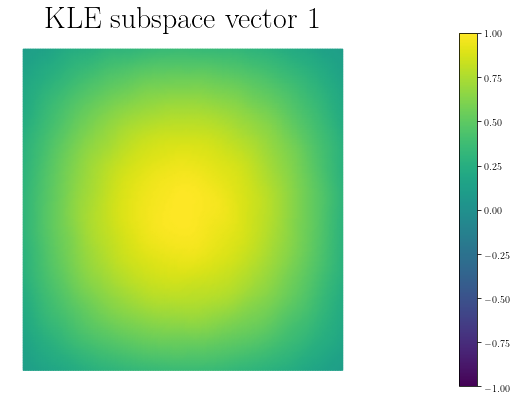

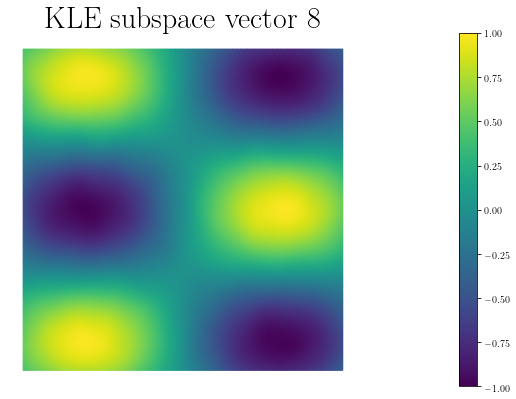

In [4]:
KLE_input_np = np.load(data_path+'KLE_projector.npy')

KLE_input_MV = dense_to_mv(KLE_input_np,constructor_vector)

# plot_eigenvectors(Vh1,KLE_input_MV,'KLE subspace vector')

whiches = [0,7]
for which in whiches:
    plot_eigenvector(Vh1,KLE_input_MV,'KLE subspace vector',which = which,\
                  outname = 'kle_helmholtz_eig'+str(which)+'_g'+str(gamma)+'_d'+str(delta)+'_nx'+str(nx)+'.pdf')

